# simple RBC

In [2]:
using MacroModelling

## Define the model

・**家計**  
- 効用関数  
\begin{equation*}
 E_0\sum^{\infty}_{t=0}\beta^tln(c_t)
\end{equation*}  
- 予算制約  
\begin{equation*}
 c_t + k_t = (1 - \delta)k_{t-1} + R_tk_{t-1} + \Pi_t
\end{equation*}
- オイラー方程式  
\begin{equation*} 
1/c_t = \beta E_t[(R_{t+1} + 1 - \delta)1/c_{t+1}]
\end{equation*}

・ **企業**  
- 利潤  
\begin{equation*}
\Pi_t = q_t - R_tk_{t-1}
\end{equation*}
- 生産関数
\begin{equation*}
q_t = e^{z_t}k^{\alpha}_{t-1}
\end{equation*}
- FOC($k_t$)
\begin{equation*}
R_t = \alpha e^{z_t}k^{\alpha -1}_{t-1}
\end{equation*}  
資本のレンタル料（コスト）が資本の限界生産性に等しくなる。

・**財市場**  
\begin{align*}
     　&q_t = c_t + i_t \\
with:　&i_t = k_t - (1 - \delta)k_{t - 1}
\end{align*}

### Equations describing the dynamics of the economy:

- **オイラー方程式**  
\begin{equation*}
1/c_t = \beta/c_{t+1}(\alpha e^{z_{t+1}}k^{\alpha - 1} + (1 - \delta))
\end{equation*}
- **資本蓄積**
\begin{equation*}
c_t + k_t = (1 - \delta)k_{t-1} + q_t
\end{equation*}
- **生産関数**  
\begin{equation*}
q_t = e^{z_t}k^{\alpha}_{t-1}
\end{equation*}
- **技術ショック**  
\begin{equation*}
z_t = \rho^zz_{t-1} + \sigma^z\epsilon^z_t
\end{equation*}

In [4]:
@model RBC begin
    1 / c[0] = (β / c[1]) * (α * exp(z[1]) * k[0]^(α -1) + (1 - δ))

    c[0] + k[0] = (1 - δ) * k[-1] + q[0]

    q[0] = exp(z[0]) * k[-1]^α

    z[0] = ρᶻ * z[-1] + σᶻ * ϵᶻ[x]   # Exogenous variables(shocks) are indicated by x

end

Model:        RBC
Variables
 Total:       4
  Auxiliary:  0
 States:      2
  Auxiliary:  0
 Jumpers:     2
  Auxiliary:  0
Shocks:       1
Parameters:   5


## Define the parameters

In [5]:
@parameters RBC begin
    σᶻ = 0.01
    ρᶻ = 0.2
    δ = 0.02
    α = 0.5
    β = 0.95
end

Remove redundant variables in non stochastic steady state problem:	1.647 seconds
Set up non stochastic steady state problem:				6.302 seconds
Take symbolic derivatives up to first order:				17.873 seconds
Find non stochastic steady state:					0.726 seconds
Model:        RBC
Variables
 Total:       4
  Auxiliary:  0
 States:      2
  Auxiliary:  0
 Jumpers:     2
  Auxiliary:  0
Shocks:       1
Parameters:   5


## Plot impulse response function (IRFs)

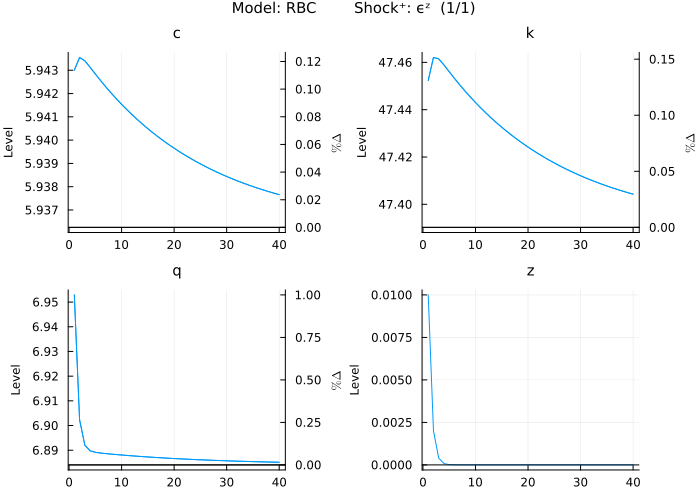

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [6]:
import StatsPlots

plot_irf(RBC)

# The left y-axis shows the level of the variable, 
# while the right y-axis shows the percentage deviation from steady state.
# The horizontal black line marks the steady state.

## Explore other parameter values

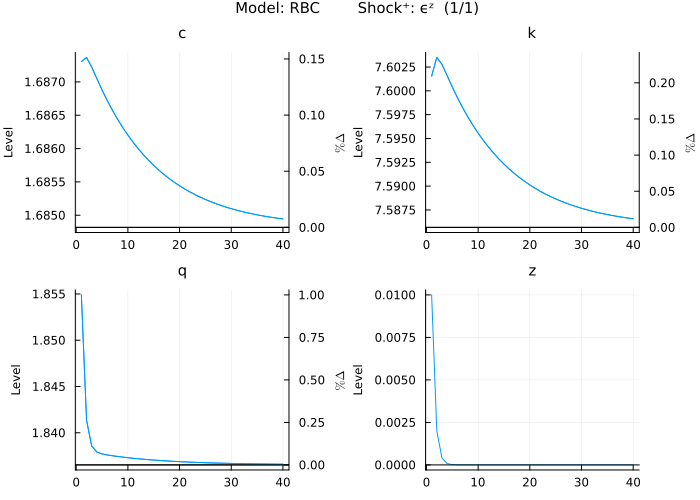

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [ ]:
plot_irf(RBC, parameters = :α => 0.3)  # Change the value of α to 0.3 (previous value was 0.5)

# Updating the plot for new parameter is significantly faster than re-running the model.

## Plot model simulation

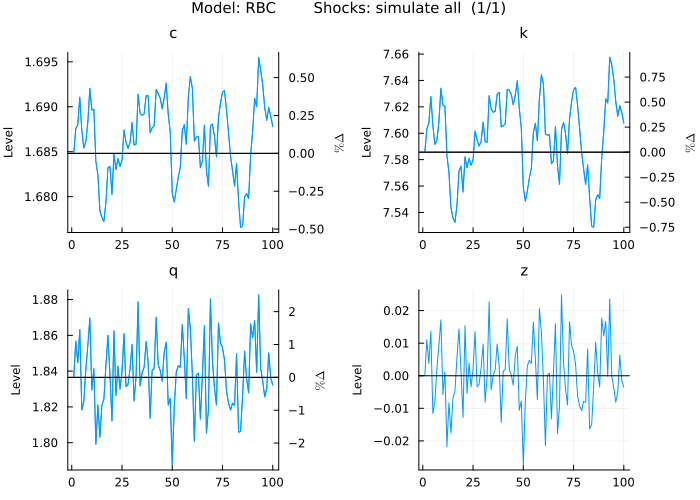

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [7]:
plot_simulation(RBC)

## Plot specific series of shocks

In [8]:
shock_series = zeros(1,4)

1×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0

In [10]:
shock_series[1,2] = 1

1

In [11]:
shock_series[1,4] = -1

-1

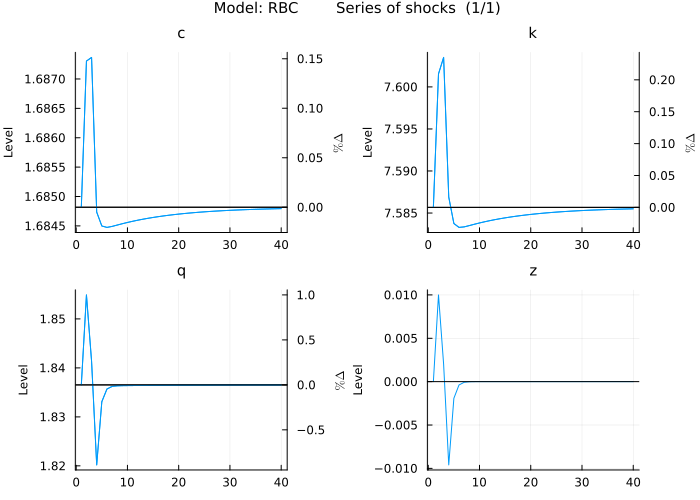

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [ ]:
plot_irf(RBC, shocks = shock_series)

# The plot shows the two shocks hitting the economy in periods 2 and 4 
# and then continues the simulation for 40 periods.

## Model statistics

In [ ]:
get_steady_state(RBC)

# The derivatives of k with respect to β is 165.319.
# This means that if we increase β by 1, k would increase by 165.319 approximately.

2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variables_and_calibrated_parameters ∈ 4-element Vector{Symbol}
→   Steady_state_and_∂steady_state∂parameter ∈ 6-element Vector{Symbol}
And data, 4×6 Matrix{Float64}:
        (:Steady_state)  (:σᶻ)  (:ρᶻ)    (:δ)     (:α)       (:β)
  (:c)   1.68482          0.0    0.0    -15.4383   6.77814    8.70101
  (:k)   7.58567          0.0    0.0   -149.201   58.0802   165.319
  (:q)   1.83653          0.0    0.0    -10.8367   7.93974   12.0074
  (:z)   0.0              0.0    0.0      0.0      0.0        0.0

In [ ]:
get_steady_state(RBC, parameters = :β => .951)  # Change the value of β to 0.951 (previous value was 0.95)

# The new value of β changed the SS as expected and k increased by 0.168.
# The elasticity(0.168/0.001) comes close to the partial derivatives previously calculated (165.319).

2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variables_and_calibrated_parameters ∈ 4-element Vector{Symbol}
→   Steady_state_and_∂steady_state∂parameter ∈ 6-element Vector{Symbol}
And data, 4×6 Matrix{Float64}:
        (:Steady_state)  (:σᶻ)  (:ρᶻ)    (:δ)     (:α)       (:β)
  (:c)   1.69358          0.0    0.0    -15.7336   6.85788    8.82312
  (:k)   7.75393          0.0    0.0   -154.87    59.6114   171.24
  (:q)   1.84866          0.0    0.0    -11.077    8.05011   12.2479
  (:z)   0.0              0.0    0.0      0.0      0.0        0.0

## Standard deviations